# Linear Regression (선형회귀) cross section에만 적용됨. 시계열X

$$ Y = \beta_0 + \beta_1X + \epsilon $$ //epsilon = error

- $ \beta $ : coefficeints //(ex) 몸무게와 상관관계를 가지는 factor

$\epsilon$ ~ N(0, σ) normal distribution을 따르면

$$ Y = \beta_0 + \beta_1X $$ <-여기에 ^붙이기


베타 제로 베타 원의 추정치를 구하면 와이가 구해짐
(햇이 붙은게 추정치)

내 prediction과 실제의 값 사이의 차이 : e(residual) = Y - Y^

두번째 사진
regression line이 Y hat임

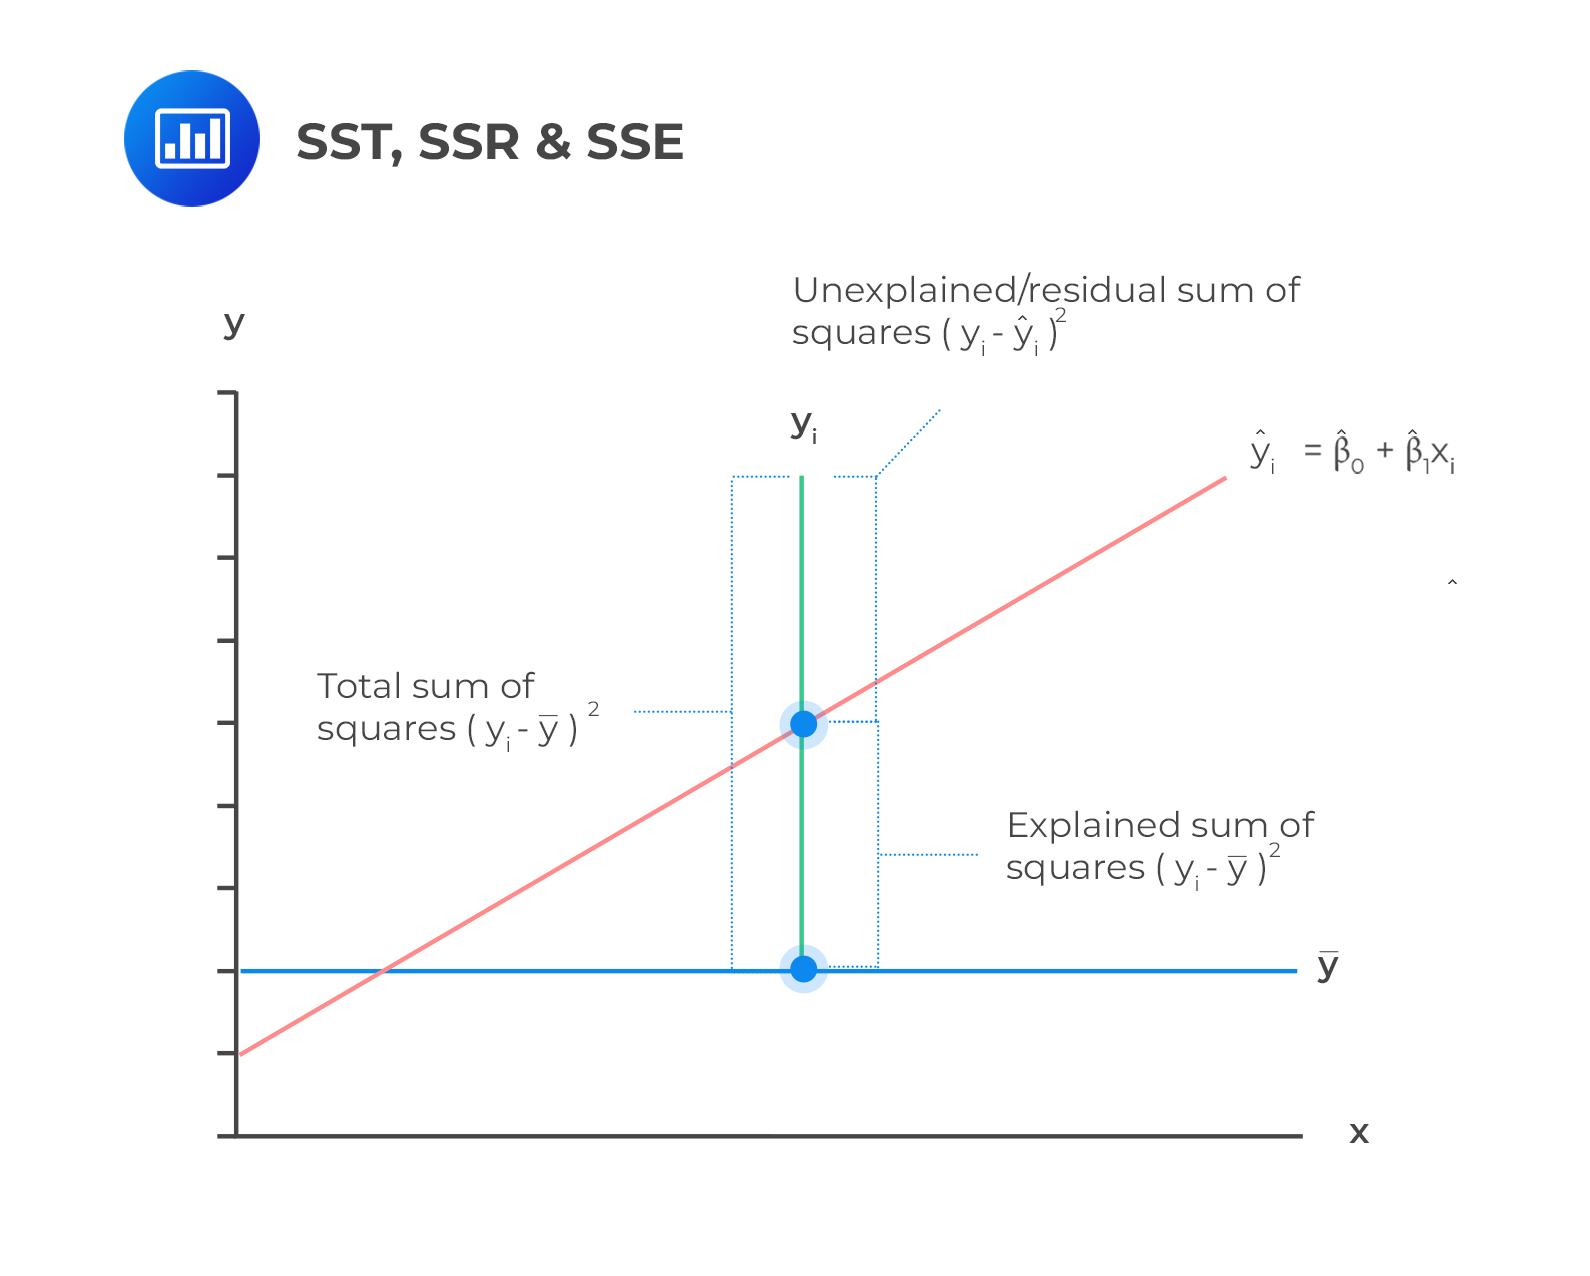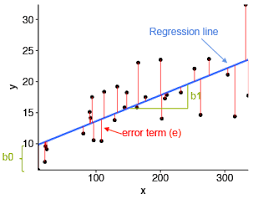

- 검정색 점 : 실제 데이터
- 파란색 선 : 모형을 추정한 선형
- 빨간색 선 : 추정한 모형과 실제 값의 차이
- 모형의 추정은 빨간색 라인을 제곱해서 극소점을 찾는 것

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2} $$

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x} $$

## coefficients 추정 및 해석

- 추정된 $\beta$값들이 모형을 예측하는데 적합한가? (모수가 너무 작으면 적합하지 않다. 공백이 생길수도)
- p-value 확인할 필요가 있다.
  - 통계적으로 유의미함을 계량화하는 수치

- 귀무가설 ($H_0$ : the null hypothesis)
  - H0
  - 독립변수(X)와 종속변수(Y)는 no association/correlation

  - p-value가 0.05보다 작은 경우, 독립변수와 종속변수가 strong relationship을 가짐 => 귀무가설 reject and 해설이 들어가야함

  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving data_LS.csv to data_LS.csv


In [3]:
df = pd.read_csv("data_LS.csv")

In [4]:
df.head()

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


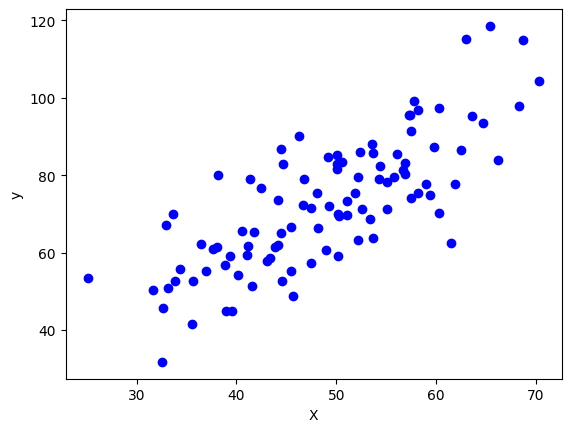

In [6]:
plt.scatter(df["X"], df["y"], color = "b")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [8]:
len(df["X"])

100

In [9]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [13]:
X_bar = np.mean(X)
y_bar = np.mean(y)

In [10]:
len(X)

100

In [17]:
num = 0
den = 0

for i in range(len(X)):
  num += (X[i] - X_bar) * (y[i] - y_bar) #num : 분자 //아까 베타햇원 식의 분자
  den += (X[i] - X_bar) ** 2

beta_1 = num/den
beta_0 = y_bar - beta_1 * X_bar
print(beta_1, beta_0) #기울기 1.32, 절편 8정도 -> 이 값이 온당한가? p-value로 구함

1.3224310226878686 7.991020985734423


In [18]:
y_pred = beta_0 + beta_1 * X #hat 생략

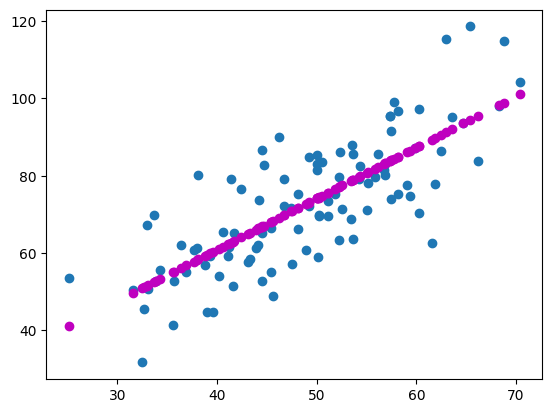

In [19]:
plt.scatter(X, y)
plt.scatter(X, y_pred, color = "m")
plt.show()

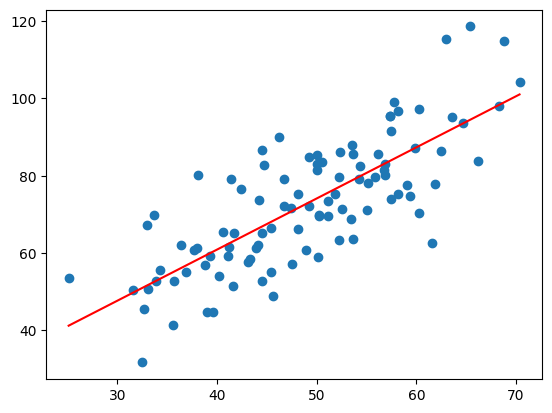

In [22]:
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color = "r" )
plt.show()

In [23]:
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [24]:
df = pd.read_csv("advertising.csv")

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
df.shape

(200, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [30]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

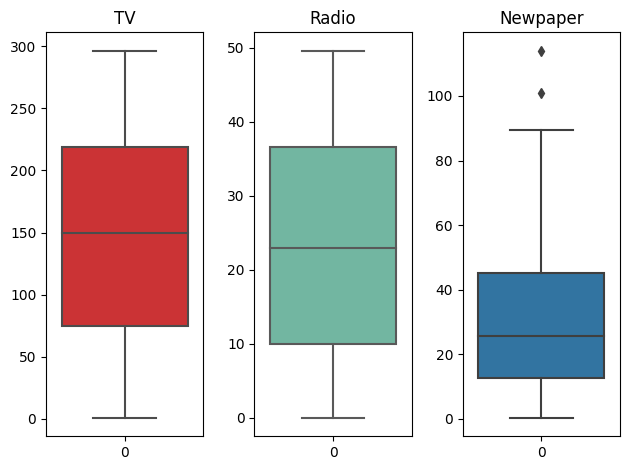

In [41]:
fig, ax = plt.subplots(1, 3) #1열 3행
plt1 = sns.boxplot(df["TV"], ax = ax[0], palette = "Set1").set(title = "TV")
plt1 = sns.boxplot(df["Radio"], ax = ax[1], palette = "Set2").set(title = "Radio")
plt1 = sns.boxplot(df["Newspaper"], ax = ax[2]).set(title = "Newpaper")
plt.tight_layout()

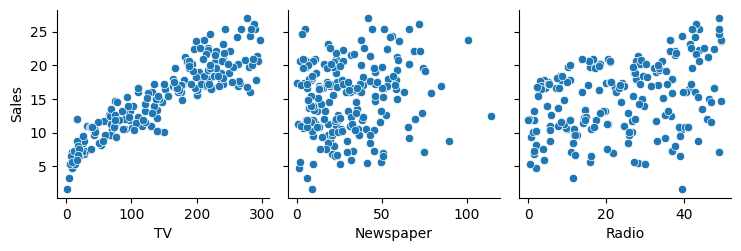

In [43]:
sns.pairplot(df, x_vars = ["TV", "Newspaper", "Radio"], y_vars = "Sales", kind = "scatter")
plt.show()

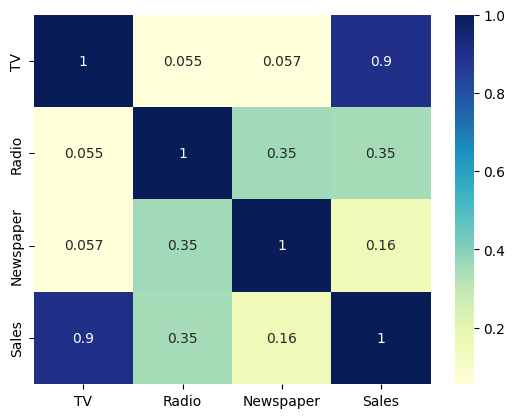

In [45]:
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu") #annot = True : 실제로 그 값을 알려달라, cmap : color map
plt.show()
#pearson correlation은 기울기와 상관없이 선형이기만 하면 됨. x와 y가 선형적 관계에 있기만 하면 됨(1에 가까울 수록 선형)(본인거는 항상 1)
#y = beta_0 + beta_1*X식의 beta_1으로 본다면 correlation이 0.1인 것이 0.8보다 크다.

In [46]:
X = df["TV"]
y = df["Sales"]

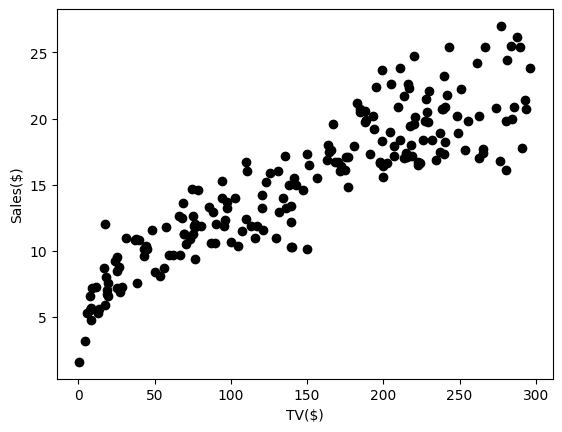

In [48]:
plt.scatter(df["TV"], df["Sales"], c = "k")
plt.xlabel("TV($)")
plt.ylabel("Sales($)")
plt.show()

# 우리의 null hypothesis 귀무가설 tv와 sales는 관계없다.

In [49]:
import statsmodels.api as sm

$$ Y = \beta_0 + \beta_1X $$
행렬로 표시하면
= [1, X] 세로[$$\beta_0, \beta_1$$]

In [50]:
X_sm = sm.add_constant(X)

In [51]:
X_sm.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [54]:
Lr = sm.OLS(y, X_sm).fit() #Lr : linear regression

In [55]:
print(Lr.summary()) #const TV인 곳 보기. coef = 0.0555(beta_1임. 기울기). 귀무가설을 reject. 상관관계가 높다.
#const는 X가 제로일 때 6.97만큼 팔린다.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.93e-74
Time:                        05:07:56   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

### Results

- 1. coefficients $\beta$s는 유의미함(p-value)

- 2. TV의 coefficient $\beta_1$은 0.555 (p-value = 0.000 : strong relationship)
- 3. TV와 Sales의 관계를 나타내는 $\beta_1$은 통계적으로 유의미함/statistically significant하다.


## $R^2$ (결정계수) R-squared

- 추정한 선형모형이 주어진 자료에 적합한 정도를 재는 척도
- 종속변수(y)의 분산 중에서 적합된 모형이 설명 가능한 부분의 비율을 의미함

$$ Sales = 6.9748 + 0.0555\times TV$$ 위에 y 그식

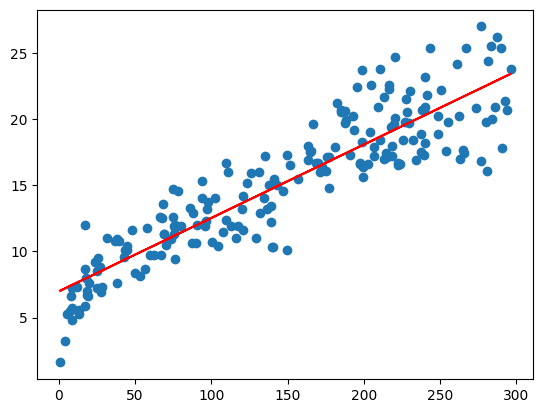

In [56]:
plt.scatter(X, y)
plt.plot(X, 6.9748+0.0555*X, color = "r")
plt.show()

In [57]:
#regression 돌리기 전에 각각 분석. 둘의 상관관계가보이면 그래프 보여주고 결과표도 써야함. 캡처 ㄴㄴ R square가 의미하는 바. p-value가 이렇기때문에 뭐다 분석해야함

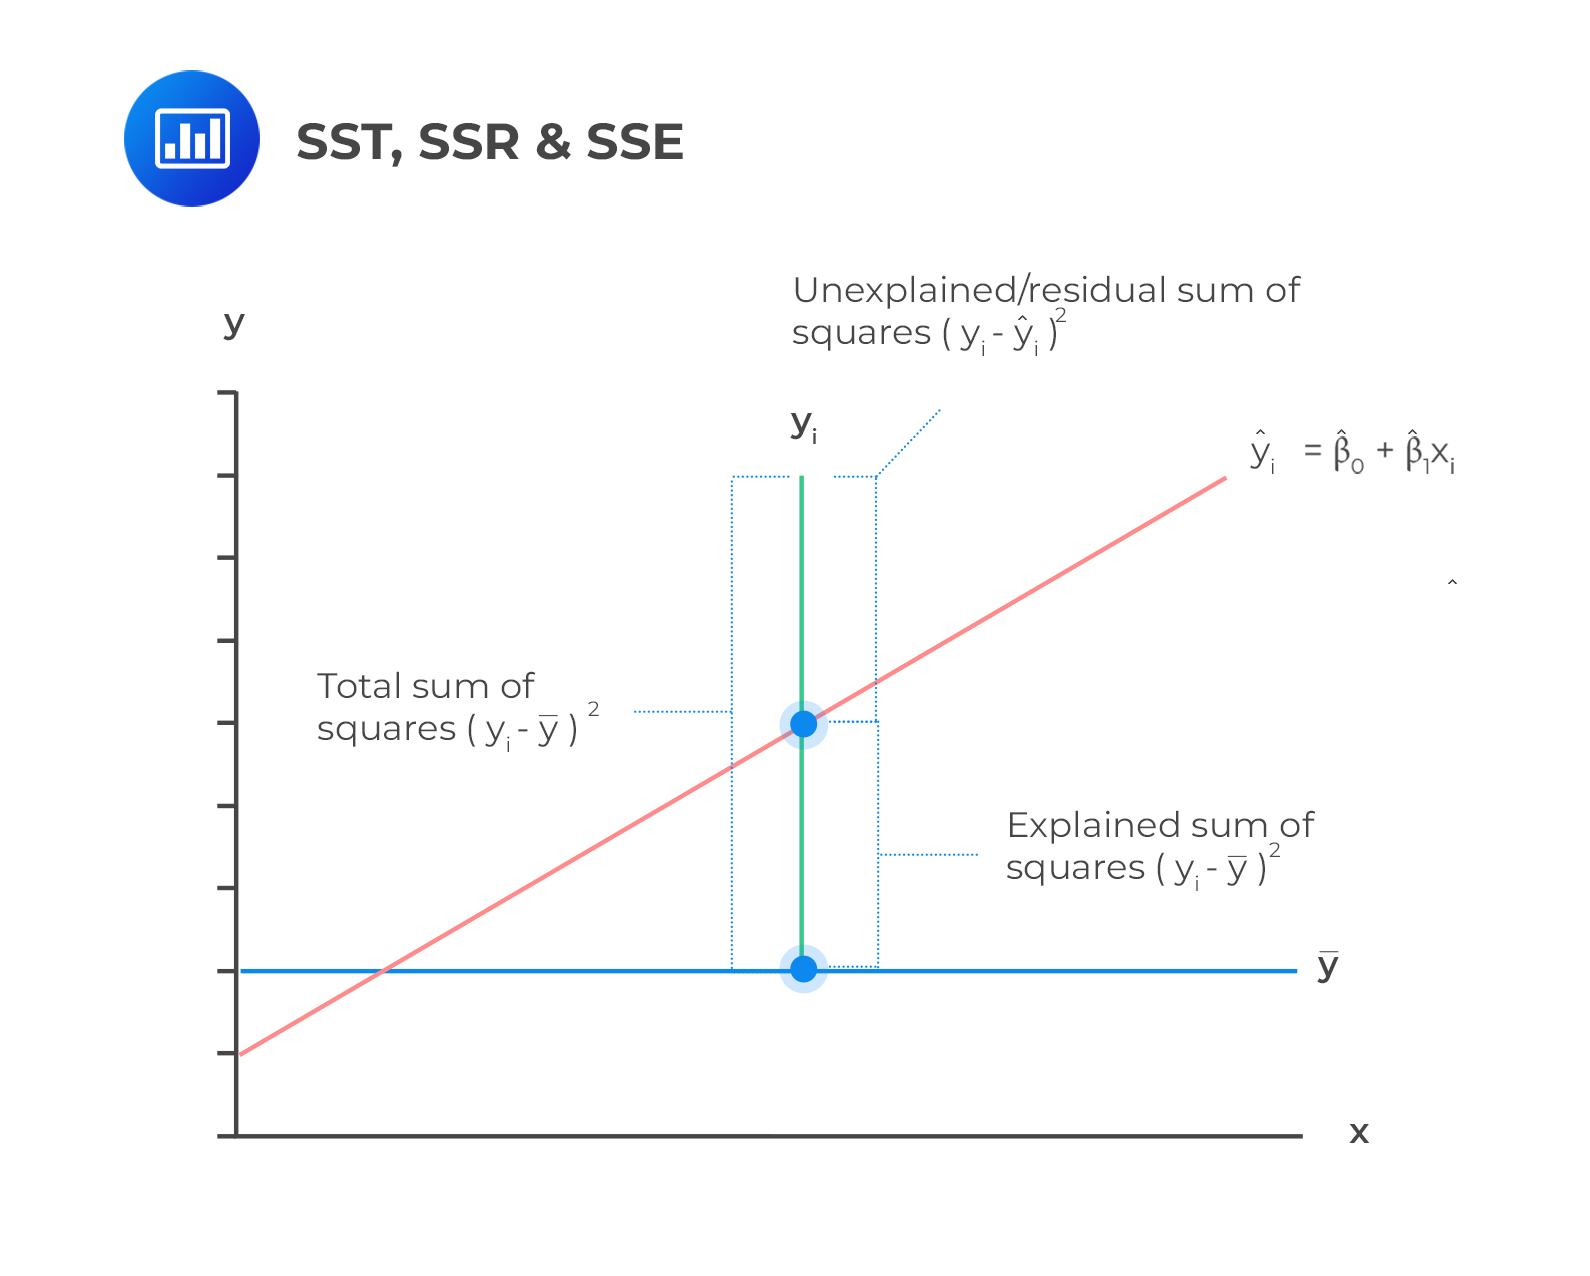

unexplained sum of squares : y_i와 우리가 추정한 y_i hat간의 차이
regression, x 생각하지않고 평균을 내는 것 y_bar. x가 y에 전혀 영향을 미치지 않을 때의 변수

그 값(y_bar)와 prediction간의 차이가 explained sum of squares이다. 더 잘 설명함. 그림 수식 잘못됨. 아래보셈

- SST(y의 전체 변동) : total sum of squares
$$ \sum(y_i - \bar{y})^2 $$

- SSR(모형에 의해 설명되는 변동) : explained sum of squares (residual sum of squared error)
$$ \sum(\hat{y}_i - \bar{y}) ^2 $$

- SSE(모형에 설명되지 않은 변동) : sum of squared error : 오차의 제곱
$$ \sum(y_i - \hat{y}_i)^2 $$

$$ R^2 = \frac{SSR}{SST} = \frac{1-SSE}{SST} = \frac{선형모형편차}{전체편차}$$

$R^2\in[0,1]$
변수를 넣을 수록 r square가 높아지므로 엉뚱한 변수를 넣어도 높아지는 함정

In [59]:
y_pred = Lr.predict(X_sm)
y_pred

0      19.737265
1       9.443004
2       7.928816
3      15.377734
4      17.002852
         ...    
195     9.093576
196    12.199603
197    16.792086
198    22.704630
199    19.848195
Length: 200, dtype: float64

In [60]:
res = y - y_pred #residual=e

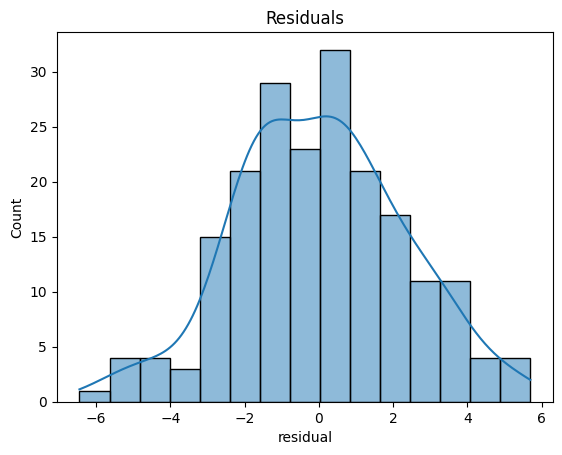

In [61]:
sns.histplot(res, bins = 15, kde = True)
plt.title("Residuals")
plt.xlabel("residual")
plt.show()

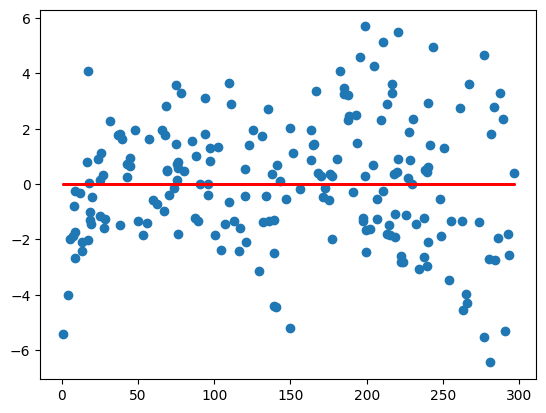

In [63]:
plt.scatter(X, res)
plt.plot(X, X*0, color = "r", linewidth = 2.0) #0근처에 있어야함
plt.show()

In [64]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [65]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [66]:
df.columns.difference(["Sales"]) # Sales빼기. difference 차집합 => Sales가 dependant variable이됨

Index(['Newspaper', 'Radio', 'TV'], dtype='object')

In [67]:
df[df.columns.difference(["Sales"])]

,Newspaper,Radio,TV
0,69.2,37.8,230.1
1,45.1,39.3,44.5
2,69.3,45.9,17.2
3,58.5,41.3,151.5
4,58.4,10.8,180.8
...,...,...,...
195,13.8,3.7,38.2
196,8.1,4.9,94.2
197,6.4,9.3,177.0
198,66.2,42.0,283.6


In [68]:
df = X